In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import scipy as sp
from math import *

In [61]:
data = pd.read_csv('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [62]:
data = data.dropna()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [64]:
data = data.drop(columns='name', axis=1)

In [65]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [66]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

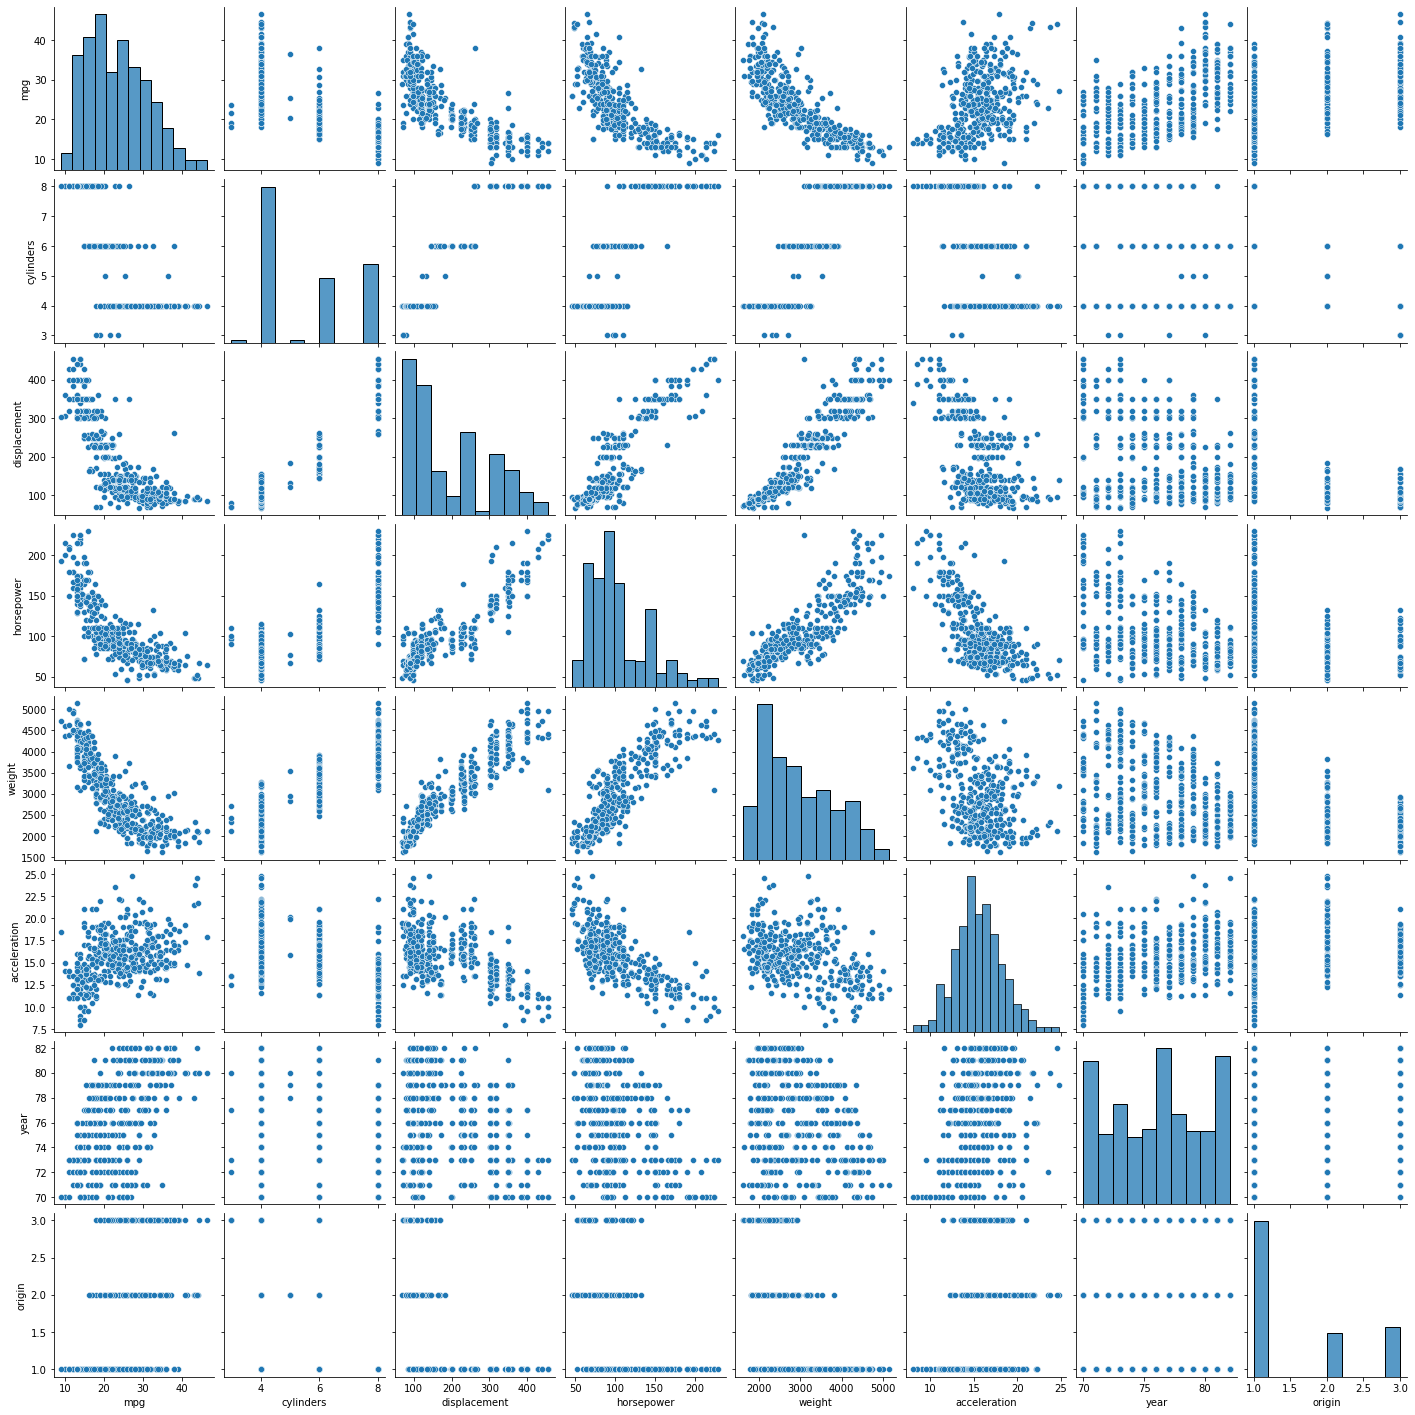

In [41]:
sns.pairplot(data)

<AxesSubplot:>

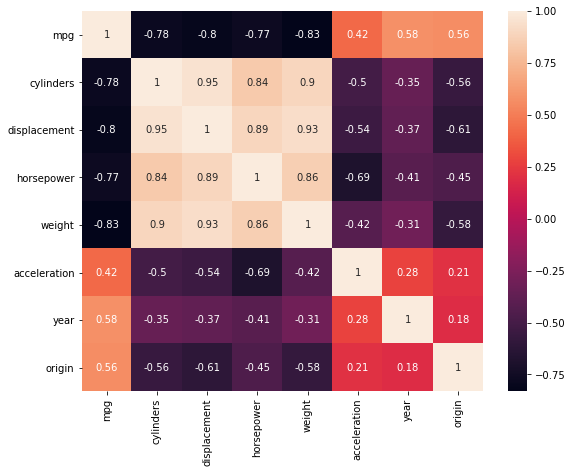

In [42]:
plt.subplots(figsize=(9,7))
corr = data.corr()
sns.heatmap(corr, annot= True)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

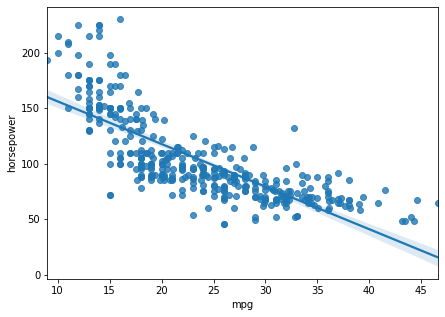

In [67]:
plt.subplots(figsize=(7,5))
sns.regplot(data = data, x= 'mpg', y= 'horsepower', x_ci= 95)

In [68]:
X = np.asarray(data.drop('mpg',axis=1)).reshape(-1,1)
y = np.asarray(data['mpg']).reshape(-1,1)

In [69]:
#Multiple linear regression model
from sklearn.linear_model import LinearRegression

X = data.drop('mpg',axis=1)
y = data['mpg']

mlr_model = LinearRegression()
mlr_model = mlr_model.fit(X,y)

In [103]:
print(mlr_model.intercept_)
print(mlr_model.coef_)

-17.218434622017522
[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]


In [78]:
results = smf.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                        0.00
Time:                        12:18:08   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
year             0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
pred_val = results.fittedvalues.copy()
true_val = data['mpg'].values.copy()
residual = true_val - pred_val

Text(0.5, 1.0, 'Residual vs Fitted')

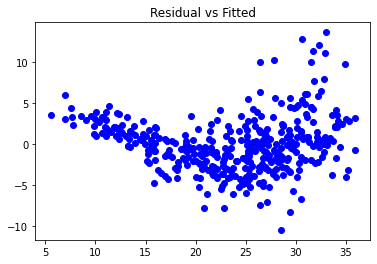

In [72]:
fig, ax = plt.subplots()
_ = ax.scatter(pred_val, residual, c= 'blue')
plt.title('Residual vs Fitted')

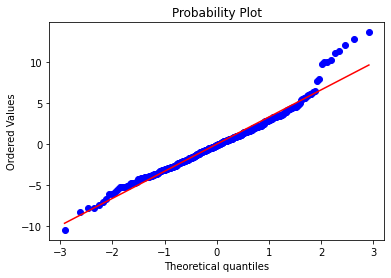

In [73]:
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [116]:
#Initialise and fit simple linear regression model using `statsmodels`
model = smf.OLS.from_formula('mpg ~ horsepower', data)
model = model.fit()

In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           7.03e-81
Time:                        15:18:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
pred_val2 = model.fittedvalues.copy()
true_val2 = data['mpg'].values.copy()
residual2 = true_val2 - pred_val2

Text(0.5, 1.0, 'Residual vs Fitted')

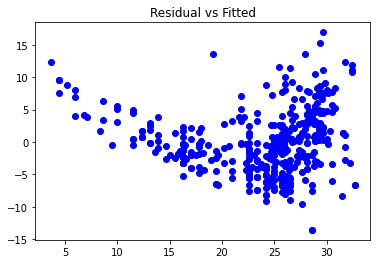

In [119]:
fig, ax = plt.subplots()
_ = ax.scatter(pred_val2, residual2, c= 'blue')
plt.title('Residual vs Fitted')

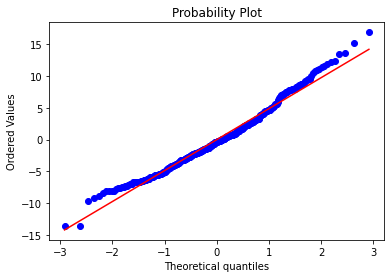

In [120]:
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual2, plot=ax, fit=True)

In [104]:
model2 = smf.OLS.from_formula('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data= data)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          2.04e-139
Time:                        15:12:32   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model3 = smf.OLS.from_formula('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year * origin', data= data)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.60e-140
Time:                        15:13:21   Log-Likelihood:                -1018.0
No. Observations:                 392   AIC:                             2054.
Df Residuals:                     383   BIC:                             2090.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.4915      9.044      0.939      0.348      -9.290      26.273
cylinders       -0.5042      0.319     -1.579      0.115      -1.132       0.123
displacement     0.0157      0.008      2.081      0.038       0.001       0.030
horsepower      -0.0140      0.014     -1.025      0.306      -0.041       0.013
weight          -0.0064      0.001     -9.851      0.000      -0.008      -0.005
acceleration     0.0918      0.098      0.941      0.348      -0.100       0.284
year             0.4189      0.113      3.723      0.000       0.198       0.640
origin         -14.0456      4.699     -2.989      0.003     -23.284      -4.807
year:origin      0.1989      0.060      3.298      0.001       0.080       0.317
==============================================================================
Omnibus:                       31.636   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.301
Skew:                           0.542   Prob(JB):                     1.19e-11
Kurtosis:                       4.381   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model4 = smf.OLS.from_formula('mpg ~ cylinders * displacement + horsepower + weight * acceleration + year + origin', data= data)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          7.76e-152
Time:                        15:13:29   Log-Likelihood:                -988.33
No. Observations:                 392   AIC:                             1997.
Df Residuals:                     382   BIC:                             2036.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -21.1799      7.263     -2.916      0.004     -35.460      -6.900
cylinders                 -1.9514      0.463     -4.214      0.000      -2.862      -1.041
displacement              -0.0606      0.015     -4.073      0.000      -0.090      -0.031
cylinders:displacement     0.0100      0.002      4.912      0.000       0.006       0.014
horsepower                -0.0529      0.013     -3.976      0.000      -0.079      -0.027
weight                     0.0002      0.002      0.129      0.897      -0.003       0.004
acceleration               0.9199      0.276      3.333      0.001       0.377       1.463
weight:acceleration       -0.0003   9.74e-05     -3.299      0.001      -0.001      -0.000
year                       0.7744      0.047     16.492      0.000       0.682       0.867
origin                     0.6842      0.270      2.531      0.012       0.153       1.216
==============================================================================
Omnibus:                       30.256   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.105
Skew:                           0.438   Prob(JB):                     5.39e-14
Kurtosis:                       4.725   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model5 = smf.OLS.from_formula('mpg ~ cylinders + displacement + np.sqrt(horsepower) + weight + acceleration + year', data= data)
model5 = model5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     278.3
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.20e-136
Time:                        15:13:36   Log-Likelihood:                -1032.9
No. Observations:                 392   AIC:                             2080.
Df Residuals:                     385   BIC:                             2108.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.0263      5.749     -0.700      0.484     -15.331       7.278
cylinders              -0.3752      0.328     -1.144      0.253      -1.020       0.269
displacement            0.0103      0.007      1.442      0.150      -0.004       0.024
np.sqrt(horsepower)    -0.8420      0.319     -2.643      0.009      -1.468      -0.216
weight                 -0.0058      0.001     -8.167      0.000      -0.007      -0.004
acceleration           -0.1091      0.108     -1.012      0.312      -0.321       0.103
year                    0.7227      0.052     13.864      0.000       0.620       0.825
==============================================================================
Omnibus:                       40.762   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.458
Skew:                           0.667   Prob(JB):                     6.11e-15
Kurtosis:                       4.493   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model6 = smf.OLS.from_formula('mpg ~ cylinders * displacement + np.sqrt(horsepower) + weight + np.log(acceleration) + year', data= data)
model6 = model6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     307.6
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          3.75e-153
Time:                        15:13:46   Log-Likelihood:                -991.11
No. Observations:                 392   AIC:                             1998.
Df Residuals:                     384   BIC:                             2030.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14.9026      7.208      2.067      0.039       0.730      29.075
cylinders                 -2.7144      0.388     -6.992      0.000      -3.478      -1.951
displacement              -0.0912      0.012     -7.315      0.000      -0.116      -0.067
cylinders:displacement     0.0144      0.002      9.338      0.000       0.011       0.017
np.sqrt(horsepower)       -1.4955      0.295     -5.062      0.000      -2.076      -0.915
weight                    -0.0043      0.001     -6.418      0.000      -0.006      -0.003
np.log(acceleration)      -1.9879      1.591     -1.250      0.212      -5.115       1.140
year                       0.7449      0.047     15.867      0.000       0.653       0.837
==============================================================================
Omnibus:                       39.770   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.985
Skew:                           0.500   Prob(JB):                     3.20e-22
Kurtosis:                       5.250   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
model7 = smf.OLS.from_formula('mpg ~ cylinders + displacement + np.square(horsepower) + weight + acceleration + year', data= data)
model7 = model7.fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     281.1
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          2.57e-137
Time:                        15:14:08   Log-Likelihood:                -1031.4
No. Observations:                 392   AIC:                             2077.
Df Residuals:                     385   BIC:                             2105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -19.0452      4.342     -4.386      0.000     -27.583     -10.508
cylinders                -0.1233      0.332     -0.371      0.711      -0.777       0.530
displacement             -0.0007      0.008     -0.090      0.928      -0.015       0.014
np.square(horsepower)     0.0001   4.18e-05      3.184      0.002     5.1e-05       0.000
weight                   -0.0072      0.001    -11.920      0.000      -0.008      -0.006
acceleration              0.2225      0.089      2.506      0.013       0.048       0.397
year                      0.7866      0.052     15.234      0.000       0.685       0.888
==============================================================================
Omnibus:                       32.067   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.548
Skew:                           0.551   Prob(JB):                     1.06e-11
Kurtosis:                       4.371   Cond. No.                     4.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""